# Working in SymPy

`SymPy` is a package for symbolic manipulation of expressions, equations, and calculus. The [website](https://docs.sympy.org/latest/index.html) for `SymPy` has tutorials explaining how things work. You can also use the `help()` and `dir()` functions to explore the properties of the `SymPy` package.

The way it is structured is that the different mathematical objects are defined with capital letters (e.g. `Symbol`, `Function`, `Matrix`) while the functions and utilities are defined with lower-case leading letters (e.g. `simplify`, `dsolve`).

### 1. **Basic Operations**

- `symbols()`: Define symbolic variables for expressions.
- `subs()`: Substitute values or expressions for variables.
- `sympify()`: Convert strings or Python objects to SymPy expressions.
- `evalf()`: Evaluate expressions to floating-point numbers.
- `lambdify()`: Convert symbolic expressions to numerical functions (supports backends like NumPy and SciPy).


### 2. **Simplifying Expressions**

- `simplify()`: Simplify general expressions (algebraic, trigonometric, etc.).
- `expand()`: Expand an expression (e.g., expand a polynomial or product).
- `factor()`: Factor expressions (e.g., factor a polynomial).
- `collect()`: Collect like terms in an expression.
- `apart()`: Partial fraction decomposition of rational expressions.
- `cancel()`: Cancel common factors in a rational function.
- `trigsimp()`: Simplify trigonometric expressions.
- `logcombine()`: Combine logarithmic terms into a single expression.
- `powsimp()`: Simplify powers and exponents.


### 3. **Calculus**

#### 3.1 Derivatives
- `diff()`: Compute derivatives of expressions (supports higher-order derivatives).

#### 3.2 Integrals
- `integrate()`: Compute symbolic integrals (both definite and indefinite).
- `integrate(f, (var, a, b))`: Compute definite integrals over an interval.
  
#### 3.3 Limits
- `limit()`: Compute the limit of an expression as a variable approaches a value.

#### 3.4 Series
- `series()`: Expand a function in a Taylor or Laurent series around a point.


### 4. **Linear Algebra**

- `Matrix()`: Define symbolic matrices.
- `det()`: Compute the determinant of a matrix.
- `inv()`: Compute the inverse of a matrix.
- `eigenvals()`: Compute eigenvalues of a matrix.
- `eigenvects()`: Compute eigenvectors of a matrix.
- `solve_linear_system()`: Solve a system of linear equations.
- `transpose()`: Transpose a matrix.
- `rref()`: Compute the reduced row echelon form of a matrix.


### 5. **Differential Equations**

- `dsolve()`: Solve ordinary differential equations (ODEs).
- `Function()`: Define a function that represents the solution of a differential equation.
- `Eq()`: Set up an equation (useful for defining differential equations).
- `classify_ode()`: Classify an ODE to determine its solution method.
- `checkodesol()`: Check whether a solution satisfies a given differential equation.


### 6. **Solving Equations**

- `solve()`: Solve algebraic equations (returns roots or solutions).
- `nonlinsolve()`: Solve systems of nonlinear equations.
- `linsolve()`: Solve systems of linear equations.
- `solvers.solvers.solve()`: A more general solver for symbolic equations.
- `solvers.decomp_ineq()`: Decompose inequalities for solving them.


### 7. **Polynomials**

- `Poly()`: Create a polynomial object for more control over polynomials.
- `degree()`: Get the degree of a polynomial.
- `roots()`: Find the roots of a polynomial.
- `gcd()`: Compute the greatest common divisor of polynomials.
- `lcm()`: Compute the least common multiple of polynomials.


### 8. **Trigonometry**

- `sin()`, `cos()`, `tan()`: Basic trigonometric functions.
- `asin()`, `acos()`, `atan()`: Inverse trigonometric functions.
- `expand_trig()`: Expand trigonometric expressions (e.g., using angle addition formulas).
- `trigsimp()`: Simplify trigonometric expressions.
- `rewrite()`: Rewrite trigonometric functions in terms of other functions (e.g., rewrite `sin(x)` in terms of exponential functions).


### Here's an example of how to solve a quadratic equation

In [1]:
import sympy as sp

# Define the symbolic variables
a, b, c, x = sp.symbols('a b c x')

# Define the quadratic equation: ax^2 + bx + c = 0
quadratic_eq = sp.Eq(a*x**2 + b*x + c, 0)

# Solve the quadratic equation for x
solutions = sp.solve(quadratic_eq, x)

# Display the solutions
solutions


[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

### Here's an example of how to solve a differential equation

In [94]:
import sympy as sp

# Define the symbolic variables and function
x, x0, y0, a, b = sp.symbols('x x0 y0 a b')  # Independent variable, constants, initial condition
y = sp.Function('y')(x)  # Dependent variable y as a function of x

# Define the first-order differential equation: a*y' + b*y = 0
diff_eq = sp.Eq(a * y.diff(x) + b * y, 0)

# Solve the differential equation
general_solution = sp.dsolve(diff_eq, y)

# Extract the solution for y(x)
solution_y = general_solution.rhs

# Apply the initial condition: y(x0) = y0
initial_condition = sp.Eq(solution_y.subs(x, x0), y0)

# Solve for the constant C1
C1_value = sp.solve(initial_condition, sp.symbols('C1'))[0]

# Substitute C1 back into the general solution
solution_with_ic = general_solution.subs(sp.symbols('C1'), C1_value)

# Display the solution with initial conditions
solution_with_ic


## Assignment (1): Use `SymPy` to test the solutions we derived in class last week. 

$Q_{tr} = A cos(\omega_\gamma t) + B sin(\omega_\gamma t)$

and 

$Q_{st} = \bar{C} cos(\omega t - \phi)$

where

$\omega_\gamma = \omega_0^2 - \gamma^2$,

$\bar{C} = \frac{F_0/m}{\sqrt{(\omega_0^2-\omega^2)^2-4\gamma^2\omega^2}}$,

and

$\phi = \frac{2\gamma\omega}{\omega_0^2-\omega^2}$

In [8]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define symbols
t, w0, gamma, w, F0, m, phi, A, B, C_bar = sp.symbols('t w0 gamma w F0 m phi A B C_bar', real=True)

# Define derived parameters
w = sp.sqrt(w0**2 - gamma**2)  # omega_d
C = F0 / m / sp.sqrt((w0**2 - w**2)**2 + (2*gamma*w)**2)  # Amplitude
phi = sp.atan(2 * gamma * w / (w0**2 - w**2))  # Phase

# Define solutions
Qtr = A * sp.cos(w * t) + B * sp.sin(w * t)  # Transient solution
Qst = C_bar * sp.cos(w * t - phi)  # Steady-state solution

# Display the expressions
print("Transient Solution Qtr:")
sp.pprint(Qtr)

print("\nSteady-State Solution Qst:")
sp.pprint(Qst)

# Substitute parameters into steady-state solution
Qst_substituted = Qst.subs({C_bar: C})

print("\nSteady-State Solution Qst with parameters substituted:")
sp.pprint(Qst_substituted)

# Verification: Check if substituted steady-state solution satisfies the governing equation
# Assuming the governing equation is of the form: m*Q'' + 2*m*gamma*Q' + m*w0**2*Q = F0*cos(w*t)
Q = Qst_substituted
Q_prime = sp.diff(Q, t)
Q_double_prime = sp.diff(Q_prime, t)

governing_eq = sp.simplify(m * Q_double_prime + 2 * m * gamma * Q_prime + m * w0**2 * Q - F0 * sp.cos(w * t))

print("\nGoverning equation residual (should simplify to 0):")
sp.pprint(governing_eq)



Transient Solution Qtr:
     ⎛     ____________⎞        ⎛     ____________⎞
     ⎜    ╱    2     2 ⎟        ⎜    ╱    2     2 ⎟
A⋅cos⎝t⋅╲╱  - γ  + w₀  ⎠ + B⋅sin⎝t⋅╲╱  - γ  + w₀  ⎠

Steady-State Solution Qst:
         ⎛                        ⎛     ____________⎞⎞
         ⎜     ____________       ⎜    ╱    2     2 ⎟⎟
         ⎜    ╱    2     2        ⎜2⋅╲╱  - γ  + w₀  ⎟⎟
C_bar⋅cos⎜t⋅╲╱  - γ  + w₀   - atan⎜─────────────────⎟⎟
         ⎝                        ⎝        γ        ⎠⎠

Steady-State Solution Qst with parameters substituted:
      ⎛                        ⎛     ____________⎞⎞
      ⎜     ____________       ⎜    ╱    2     2 ⎟⎟
      ⎜    ╱    2     2        ⎜2⋅╲╱  - γ  + w₀  ⎟⎟
F₀⋅cos⎜t⋅╲╱  - γ  + w₀   - atan⎜─────────────────⎟⎟
      ⎝                        ⎝        γ        ⎠⎠
───────────────────────────────────────────────────
                ________________________           
               ╱  4      2 ⎛   2     2⎞            
           m⋅╲╱  γ  + 4⋅γ ⋅⎝- γ  + w₀ ⎠      

## Assignment (2): Create representative plots of $\bar{C}$ and $\phi$ 


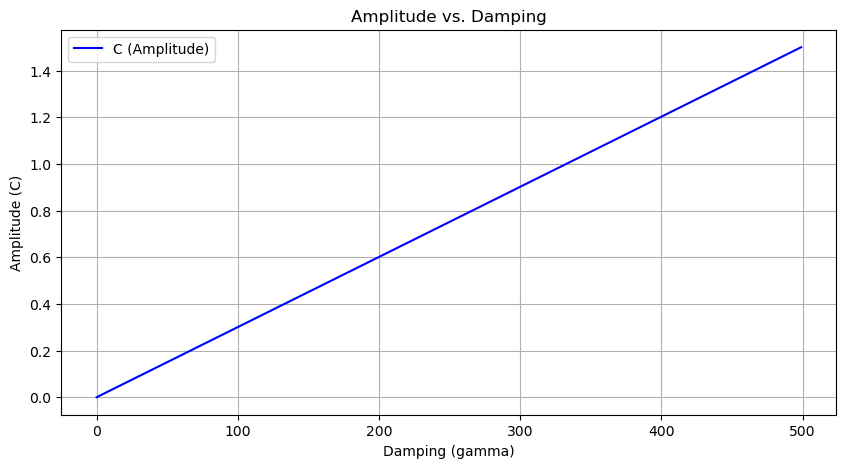

NameError: name 'phi_vals' is not defined

<Figure size 1000x500 with 0 Axes>

In [11]:

# Plot C (Amplitude) vs. gamma
plt.figure(figsize=(10, 5))
plt.plot(valid_gamma_vals, label='C (Amplitude)', color='blue')
plt.xlabel('Damping (gamma)')
plt.ylabel('Amplitude (C)')
plt.title('Amplitude vs. Damping')
plt.legend()
plt.grid()
plt.show()

# Plot phi (Phase) vs. gamma
plt.figure(figsize=(10, 5))
plt.plot(valid_gamma_vals, phi_vals, label='phi (Phase)', color='red')
plt.xlabel('Damping (gamma)')
plt.ylabel('Phase (phi) [radians]')
plt.title('Phase vs. Damping')
plt.legend()
plt.grid()
plt.show()